Нужно: 
1) Вернуть абзацы


2) Проверить насколько комментарий является упрощением закона 


3) Проверить полноту каждого комментария. Если нет, то добавить недостающие элементы вручную


In [59]:
import pandas as pd


imp1 = pd.read_csv('important_docs1.csv', delimiter=';', encoding='windows-1251')
imp2 = pd.read_csv('important_docs2.csv', delimiter=';', encoding='windows-1251')
com1 = pd.read_csv('common_docs1.csv', delimiter=';', encoding='windows-1251')
com2 = pd.read_csv('common_docs2.csv', delimiter=';', encoding='windows-1251')
com3 = pd.read_csv('common_docs3.csv', delimiter=';', encoding='windows-1251')

Объединяем в один корпус

In [60]:
imp1

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,В том числе компания поставляет тепло и горячу...,10 февраля 2022 г.
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Соответствующий документ опубликован на 10-й с...,3 февраля 2022 г.
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/ks-dok.html,Именем Российской Федерации Конституционный С...,В 2015 году Татьяна Малкова из Челябинской обл...,25 января 2022 г.
3,Приказ Министерства экономического развития Ро...,https://rg.ru/2022/01/25/intellekt-dok.html,"В целях реализации федерального проекта ""Искус...",Регулярный мониторинг позволит получать объект...,25 января 2022 г.
4,Приказ Министерства экономического развития Ро...,https://rg.ru/2022/01/25/rabota-dok.html,"В целях реализации федерального проекта ""Искус...",Регулярный мониторинг позволит получать объект...,25 января 2022 г.
...,...,...,...,...,...
851,"Федеральный закон от 23 мая 2016 г. N 147-ФЗ ""...",https://rg.ru/2016/05/25/ekipaj-dok.html,Принят Государственной Думой 10 мая 2016 года ...,"Закон, который подписал президент Владимир Пут...",25 мая 2016 г.
852,"Федеральный закон от 23 мая 2016 г. N 143-ФЗ ""...",https://rg.ru/2016/05/25/pensii-kategorii-dok....,Принят Государственной Думой 11 мая 2016 года ...,Закон об этом подписан президентом страны. Вст...,25 мая 2016 г.
853,Постановление Пленума Верховного Суда Российск...,https://rg.ru/2016/05/18/vstamozh-dok.html,В целях обеспечения единства практики применен...,В спорные ситуации на таможне попадают не толь...,18 мая 2016 г.
854,"Федеральный закон от 3 мая 2016 г. N 140-ФЗ ""О...",https://rg.ru/2016/05/06/duma-dok.html,Принят Государственной Думой 22 апреля 2016 го...,Хотя и раньше депутатам приходилось исключать ...,6 мая 2016 г.


In [61]:
data = pd.concat([imp1, imp2, com1, com2, com3])

In [62]:
import re

def cyr2dig(x):
    year = re.search('\d{4}', x)    
    return year.group(0)

data['Год'] = data['Дата'].apply(cyr2dig)

In [63]:
data = data.sort_values(by='Год', ascending=False)

In [64]:
del data['Год']

In [219]:
data = data.reset_index(drop=True)

In [66]:
data

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,В том числе компания поставляет тепло и горячу...,10 февраля 2022 г.
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный С...,Бизнесмен Сергей Филиппов был под следствием б...,25 января 2022 г.
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Соответствующий документ опубликован на 10-й с...,3 февраля 2022 г.
3,Федеральный закон от 30 декабря 2021 г. N 459-...,https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 г...,По словам статс-секретаря - замглавы МЧС Росси...,10 января 2022 г.
4,Федеральный закон от 30 декабря 2021 г. N 436-...,https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 г...,На базе двух фондов создается новый Фонд разви...,10 января 2022 г.
...,...,...,...,...,...
2692,Постановление о совершенствовании госрегулиров...,https://rg.ru/2009/08/14/lekarstva-dok.html,Правительство Российской Федерации постановляе...,Производители жизненно необходимых и важнейших...,14 августа 2009 г.
2693,"Правила оплаты проезда осужденных, самостоятел...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Угол...,"Правительство утвердило новые правила, как опл...",12 августа 2009 г.
2694,Изменения в постановление правительства о него...,https://rg.ru/2009/08/07/sysk-izmenenia-dok.html,Правительство Российской Федерации постановляе...,Частные охранники и детективы должны будут про...,7 августа 2009 г.
2695,Изменения в статье 144 Гражданского процессуал...,https://rg.ru/2009/04/08/gpk-izmenenie-dok.html,Принят Государственной Думой 13 марта 2009 год...,"Верховный суд разъяснил, кому переходят по нас...",8 апреля 2009 г.


In [108]:
##  смотрим статистику по датасету

df = pd.DataFrame({})

df['Text_len'] = data["Текст"].astype(str).apply(lambda x: len(x.split(' ')))
df['Comment_len'] = data['Комментарий РГ'].astype(str).apply(lambda x: len(x.split(' ')))

In [109]:
df

,Text_len,Comment_len
0,6482,262
1,4973,263
2,5975,313
3,836,265
4,14382,205
...,...,...
2692,3013,625
2693,681,327
2694,2023,173
2695,71,167


array([[<AxesSubplot:title={'center':'Text_len'}>,
        <AxesSubplot:title={'center':'Comment_len'}>]], dtype=object)

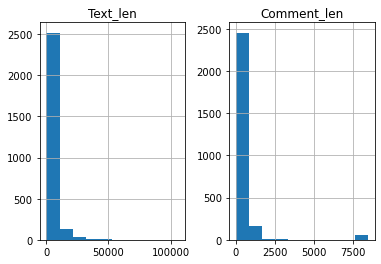

In [110]:
df.hist()

In [124]:
len([tlen for tlen in df.Text_len if tlen > 50000])

11

In [243]:
## удаляем маленькие законы

def check(article):
    if len(article.split(' ')) < 400:
        return 'DELETE'
    else:
        return article
        
data['Текст'] = data['Текст'].apply(check)

In [256]:
import numpy as np


data.drop(list(np.where(data['Текст']=='DELETE')[0]), axis = 0, inplace = True)

In [259]:
data = data.reset_index(drop=True)

In [278]:
len(data)

1879

In [310]:
## Смотрим статистику по комментариям которые больше чем 

k = []
t = []
more = []
status = []

for ind in range(len(data)):
    comm_len = len(data['Комментарий РГ'][ind].split(' '))
    zakon_len = len(data['Текст'][ind].split(' '))
    if comm_len > zakon_len:

        t.append(zakon_len)
        k.append(comm_len)
        more.append(float(comm_len/zakon_len) * -1)
        data['Комментарий РГ'][ind] = 'DELETE'
        status.append('DELETE')
    
    else:
        t.append(zakon_len)
        k.append(comm_len)
        more.append(float(zakon_len/comm_len))
        status.append('LEAVE')
        
        
times = pd.DataFrame({'Orig_len': t, 'Komm_len': k, 'Times': more, 'Status': status})

In [311]:
times

,Orig_len,Komm_len,Times,Status
0,6482,262,24.740458,LEAVE
1,4973,263,18.908745,LEAVE
2,5975,313,19.089457,LEAVE
3,836,265,3.154717,LEAVE
4,14382,205,70.156098,LEAVE
...,...,...,...,...
1874,8963,218,41.114679,LEAVE
1875,3013,625,4.820800,LEAVE
1876,681,327,2.082569,LEAVE
1877,2023,173,11.693642,LEAVE


In [312]:
times.groupby(['Status']).agg({'Times': ['min', 'max', 'mean'], 'Orig_len': ['min', 'max'], 'Komm_len': ['min', 'max']})

Times                          Orig_len         Komm_len      
             min           max       mean      min     max      min   max
Status                                                                   
DELETE -4.288984     -1.002242  -1.652703      409    1225      432  2998
LEAVE   1.032178  16639.000000  26.161069      401  106498        1  3265

In [316]:
len(times[times['Status'] == "DELETE"])

53

In [317]:
times[times['Status'] == "DELETE"]

,Orig_len,Komm_len,Times,Status
136,814,1058,-1.299754,DELETE
138,753,1058,-1.405046,DELETE
378,596,873,-1.464765,DELETE
413,856,1397,-1.632009,DELETE
434,545,642,-1.177982,DELETE
472,856,1397,-1.632009,DELETE
535,528,1037,-1.964015,DELETE
562,528,1037,-1.964015,DELETE
608,1015,1151,-1.133990,DELETE
625,451,599,-1.328160,DELETE


In [321]:
##  Удаляем отмеченные пары

data.drop(list(np.where(data['Комментарий РГ'] =='DELETE')[0]), axis = 0, inplace = True)

In [323]:
##  смотрим статистику по датасету заново

df = pd.DataFrame({})

df['Text_len'] = data["Текст"].astype(str).apply(lambda x: len(x.split(' ')))
df['Comment_len'] = data['Комментарий РГ'].astype(str).apply(lambda x: len(x.split(' ')))

In [324]:
## смотрим законы, которые подозрительно большие

df[df["Text_len"].astype(int) > 40000]
    

,Text_len,Comment_len
178,42234,442
914,56120,961
948,106498,2324
1020,47298,778
1049,73854,409
1086,56093,257
1122,74918,565
1124,74918,565
1260,48537,853
1261,70244,743


In [399]:
#  читаем эти тексты и их комментарии. Если они неактуальны, удаляем
#  178, 1049, 1086, 1260, 1377, 1413,   - good
#  914, 948, 1020, 1122, 1224, 1261, 1582, 1597, 1645 - should be deleted


## data["Текст"][1645]

In [400]:
## data['Комментарий РГ'][1645]

In [401]:
data.drop(labels = [914, 948, 1020, 1122, 1224, 1261, 1582, 1597, 1645], axis = 0, inplace = True)

In [402]:
data

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Важное для многих решение вынес Конституционны...,10 февраля 2022 г.
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный С...,Конституционный суд РФ обязал суды учитывать о...,25 января 2022 г.
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,"Работники, чьи обязанности переданы на аутсорс...",3 февраля 2022 г.
3,Федеральный закон от 30 декабря 2021 г. N 459-...,https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 г...,"Эвакуация из опасных зон, которым грозит затоп...",10 января 2022 г.
4,Федеральный закон от 30 декабря 2021 г. N 436-...,https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 г...,На базе двух фондов создается новый Фонд разви...,10 января 2022 г.
...,...,...,...,...,...
1874,Инструкция по организации исполнения наказаний...,https://rg.ru/2009/08/14/instrukciya-dok.html,Зарегистрирован в Минюсте РФ 25 июня 2009 г. ...,За преступления малой и средней тяжести теперь...,14 августа 2009 г.
1875,Постановление о совершенствовании госрегулиров...,https://rg.ru/2009/08/14/lekarstva-dok.html,Правительство Российской Федерации постановляе...,Производители жизненно необходимых и важнейших...,14 августа 2009 г.
1876,"Правила оплаты проезда осужденных, самостоятел...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Угол...,"Правительство утвердило новые правила, как опл...",12 августа 2009 г.
1877,Изменения в постановление правительства о него...,https://rg.ru/2009/08/07/sysk-izmenenia-dok.html,Правительство Российской Федерации постановляе...,Частные охранники и детективы должны будут про...,7 августа 2009 г.


In [403]:
data.to_csv('corpus.csv', index=False)

In [1]:
import pandas as pd

data = pd.read_csv('corpus.csv')

In [ ]:
##  дальше исправляем комменатрии, которые по каким-то причинам не запарсились полностью

In [2]:
data1 = data.iloc[:450]
data2 = data.iloc[450:900]
data3 = data.iloc[900:1350]
data4 = data.iloc[1350:]



In [8]:
from selenium import webdriver

from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait as Wait
from selenium.webdriver.support import expected_conditions as EC

from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException

from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains

from bs4 import BeautifulSoup as bs

from time import sleep

from webdriver_manager.chrome import ChromeDriverManager

import csv

import requests

from lxml import html

import re

In [9]:
driver = webdriver.Chrome(ChromeDriverManager().install())
host = 'https://rg.ru'



====== WebDriver manager ======
Current google-chrome version is 107.0.5304
Get LATEST chromedriver version for 107.0.5304 google-chrome
Driver [C:\Users\Марк\.wdm\drivers\chromedriver\win32\107.0.5304.62\chromedriver.exe] found in cache
<ipython-input-9-26ea8306c1dc>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


ssilka = 'https://rg.ru/2022/02/09/konstitucionnyj-sud-velel-garantirovat-oplatu-energii-na-opasnyh-obektah-bez-ocheredi.html'
driver.get(ssilka)

xpath = '//*[@id="layoutGlobal"]/div/div[2]/div[3]/div/div/div/div[2]/div[1]/div[4]/div'
elem = driver.find_elements_by_xpath(xpath)
print(elem)
if type(elem) is list:
    print(elem[0].text)
else:
    print(elem.text)

In [97]:
data1

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Важное для многих решение вынес Конституционны...,10 февраля 2022 г.
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный С...,Конституционный суд РФ обязал суды учитывать о...,25 января 2022 г.
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,"Работники, чьи обязанности переданы на аутсорс...",3 февраля 2022 г.
3,Федеральный закон от 30 декабря 2021 г. N 459-...,https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 г...,"Эвакуация из опасных зон, которым грозит затоп...",10 января 2022 г.
4,Федеральный закон от 30 декабря 2021 г. N 436-...,https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 г...,На базе двух фондов создается новый Фонд разви...,10 января 2022 г.
...,...,...,...,...,...
445,Федеральный закон от 1 апреля 2020 г. N 96-ФЗ ...,https://rg.ru/2020/04/03/fz-96-dok.html,Принят Государственной Думой 19 марта 2020 год...,Председатель Комитета Госдумы по государственн...,3 апреля 2020 г.
446,Федеральный закон от 26 марта 2020 г. N 68-ФЗ ...,https://rg.ru/2020/03/30/nalogi-dok.html,Принят Государственной Думой 19 марта 2020 год...,Поправки связаны с поручением главы государств...,30 марта 2020 г.
447,Федеральный закон от 26 марта 2020 г. N 67-ФЗ ...,https://rg.ru/2020/03/30/a1852309-dok.html,Принят Государственной Думой 19 марта 2020 год...,Цены будут корректироваться в случае повышения...,30 марта 2020 г.
448,Постановление Правительства Российской Федерац...,https://rg.ru/2020/03/23/postanovlenie-dok.html,В целях предотвращения распространения новой к...,Для этого достаточно подать заявление на сайте...,23 марта 2020 г.


In [12]:
from tqdm import tqdm
from selenium.common.exceptions import TimeoutException

tqdm.pandas()

def add(link):  
    try:
        driver.get(link)
    except:
        return 'No'
        
    soup = bs(driver.page_source, 'lxml')
    cl = re.compile('PageDocumentContentRelations_item__[\w|\d]*')
    
    body = soup.find('a', class_=cl)
    
    try:
        if body.find_previous('div').get_text() == 'Комментарии Российской Газеты':
            driver.get(host+body['href'])

            new = bs(driver.page_source, 'lxml')
            try:
                comment = new.find('div', class_=re.compile('^PageArticleContent_lead'))
                return comment.get_text()

            except:
                return f'Failed {driver.current_url}'
    except:
        return f'Failed {driver.current_url}'

In [111]:
data1['Full_comment'] = data1['Ссылка'].progress_apply(add)
data1.to_csv('data1.csv', index=False)

# готово

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [47:24<00:00,  6.32s/it]
<ipython-input-111-d021d6103b0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Full_comment'] = data1['Ссылка'].progress_apply(add)


In [126]:
data1[data1['Full_comment'].str.contains('None') == False]

,Название документа,Ссылка,Текст,Комментарий РГ,Дата,Full_comment
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Важное для многих решение вынес Конституционны...,10 февраля 2022 г.,Важное для многих решение вынес Конституционны...
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный С...,Конституционный суд РФ обязал суды учитывать о...,25 января 2022 г.,Конституционный суд РФ обязал суды учитывать о...
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,"Работники, чьи обязанности переданы на аутсорс...",3 февраля 2022 г.,"Работники, чьи обязанности переданы на аутсорс..."
3,Федеральный закон от 30 декабря 2021 г. N 459-...,https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 г...,"Эвакуация из опасных зон, которым грозит затоп...",10 января 2022 г.,"Эвакуация из опасных зон, которым грозит затоп..."
5,Федеральный закон от 30 декабря 2021 г. N 454-...,https://rg.ru/2022/01/11/semenovodstvo-dok.html,Принят Государственной Думой 22 декабря 2021 г...,"Закон о семеноводстве не касается дачников, ис...",11 января 2022 г.,Новая редакция закона о семеноводстве поможет ...
...,...,...,...,...,...,...
440,Постановление Правительства Российской Федерац...,https://rg.ru/2020/04/08/postanovlenie-pravite...,В соответствии со статьей 10 Федерального зако...,"Несколько дней назад вступил в силу закон, кот...",8 апреля 2020 г.,"""Российская газета"" публикует правила поведени..."
442,Федеральный закон от 1 апреля 2020 г. N 82-ФЗ ...,https://rg.ru/2020/04/06/slava-dok.html,Принят Государственной Думой 12 марта 2020 год...,Согласно новому документу к основным формам ме...,6 апреля 2020 г.,"Сегодня ""Российская газета"" публикует закон, п..."
443,Федеральный закон от 3 апреля 2020 г. о кредит...,https://rg.ru/2020/04/06/cb-dok.html,Принят Государственной Думой 1 апреля 2020 год...,Об этом рассказала глава Банка России Эльвира ...,6 апреля 2020 г.,"В Банке России призвали заемщиков, чьи доходы ..."
448,Постановление Правительства Российской Федерац...,https://rg.ru/2020/03/23/postanovlenie-dok.html,В целях предотвращения распространения новой к...,Для этого достаточно подать заявление на сайте...,23 марта 2020 г.,"""РГ"" публикует правила оформления больничных д..."


In [13]:
data2['Full_comment'] = data2['Ссылка'].progress_apply(add)
data2.to_csv('data2.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [48:10<00:00,  6.42s/it]
<ipython-input-13-c8e0604b1d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Full_comment'] = data2['Ссылка'].progress_apply(add)


In [16]:
data3['Full_comment'] = data3['Ссылка'].progress_apply(add)
data3.to_csv('data3.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [39:57<00:00,  5.33s/it]
<ipython-input-16-88b089aed01f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Full_comment'] = data3['Ссылка'].progress_apply(add)


In [18]:
data4['Full_comment'] = data4['Ссылка'].progress_apply(add)
data4.to_csv('data4.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████████| 467/467 [40:58<00:00,  5.26s/it]
<ipython-input-18-21c8b8c887ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Full_comment'] = data4['Ссылка'].progress_apply(add)


In [19]:
data4

,Название документа,Ссылка,Текст,Комментарий РГ,Дата,Full_comment
1350,Постановление о федеральной государственной ин...,https://rg.ru/2012/11/23/sistema-dok.html,"В соответствии с Федеральным законом ""Об орган...","Сегодня, согласно законам, если россияне недов...",23 ноября 2012 г.,None
1351,Постановление об утверждении требований к защи...,https://rg.ru/2012/11/07/pers-dannye-dok.html,В соответствии со статьей 19 Федерального зако...,"По новым правилам, организация, которая оперир...",7 ноября 2012 г.,"Персональные данные граждан, которые хранятся ..."
1352,Административный регламент исполнения Минкульт...,https://rg.ru/2012/10/31/minkulturi-dok.html,Зарегистрирован в Минюсте РФ 29 мая 2012 г. Р...,В настоящее время существование многих отрасле...,31 октября 2012 г.,Министерство культуры будет следить за соблюде...
1353,Постановление о некоторых вопросах реализации ...,https://rg.ru/2012/10/31/zhilje-dok.html,На основании части 35 статьи 16 [6] Федерально...,"Кроме того, снизить стоимость возводимого на б...",31 октября 2012 г.,None
1354,"Правила создания, формирования и ведения едино...",https://rg.ru/2012/10/29/reestr-dok.html,В соответствии с частями 3-5 статьи 151 Федера...,Ответственным за формирование реестра запрещен...,29 октября 2012 г.,Роскомнадзор получил официальные полномочия по...
...,...,...,...,...,...,...
1812,Инструкция по организации исполнения наказаний...,https://rg.ru/2009/08/14/instrukciya-dok.html,Зарегистрирован в Минюсте РФ 25 июня 2009 г. ...,За преступления малой и средней тяжести теперь...,14 августа 2009 г.,Failed https://rg.ru/2009/08/14/instrukciya.html
1813,Постановление о совершенствовании госрегулиров...,https://rg.ru/2009/08/14/lekarstva-dok.html,Правительство Российской Федерации постановляе...,Производители жизненно необходимых и важнейших...,14 августа 2009 г.,None
1814,"Правила оплаты проезда осужденных, самостоятел...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Угол...,"Правительство утвердило новые правила, как опл...",12 августа 2009 г.,None
1815,Изменения в постановление правительства о него...,https://rg.ru/2009/08/07/sysk-izmenenia-dok.html,Правительство Российской Федерации постановляе...,Частные охранники и детективы должны будут про...,7 августа 2009 г.,Failed https://rg.ru/2009/08/07/sysk-izmenenia...


In [67]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')
data3 = pd.read_csv('data3.csv')
data4 = pd.read_csv('data4.csv')



In [179]:
data = pd.concat([data1, data2, data3, data4])

In [180]:
data = data.reset_index(drop=True)

In [181]:
def checker(x):
    a =  re.split('\n\n', x)
    return a[1]

data = data.astype(str)
data['Комментарий РГ'][:4] = data['Комментарий РГ'][:4].apply(checker)

In [182]:
data

,Название документа,Ссылка,Текст,Комментарий РГ,Дата,Full_comment
0,"Постановление Конституционного Суда Российской Федерации от 1 февраля 2022 г. N 4-П ""по делу о п...",https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный Суд Российской Федерации в составе Председателя B.Д...,"В том числе компания поставляет тепло и горячую воду предприятию, эксплуатирующему шахту ""Интин...",10 февраля 2022 г.,"Важное для многих решение вынес Конституционный суд - о том, что на опасных производствах даже з..."
1,"Постановление Конституционного Суда Российской Федерации от 13 января 2022 г. N 2-П ""по делу о п...",https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный Суд Российской Федерации в составе Председателя B.Д...,Бизнесмен Сергей Филиппов был под следствием более десяти лет. В вину ему вменялись махинации с...,25 января 2022 г.,"Конституционный суд РФ обязал суды учитывать обстоятельства конкретного дела, решая вопрос о ком..."
2,Постановление Конституционного Суда Российской Федерации от 20 января 2022 г. N 3-П город Санкт-...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный Суд Российской Федерации в составе Председателя B.Д...,Соответствующий документ опубликован на 10-й странице. Вот что было в жалобе в КС Андрея Пешков...,3 февраля 2022 г.,"Работники, чьи обязанности переданы на аутсорсинг, должны быть уволены на тех же условиях, что и..."
3,"Федеральный закон от 30 декабря 2021 г. N 459-ФЗ ""О внесении изменений в Федеральный закон ""О за...",https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 года Одобрен Советом Федерации 24 декабря 2021 год...,"По словам статс-секретаря - замглавы МЧС России Алексея Серко, который и представлял в Думе эту...",10 января 2022 г.,"Эвакуация из опасных зон, которым грозит затопление или пожары, будет обязательной. Такие нововв..."
4,"Федеральный закон от 30 декабря 2021 г. N 436-ФЗ ""О внесении изменений в Федеральный закон ""О пу...",https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 года Одобрен Советом Федерации 24 декабря 2021 год...,На базе двух фондов создается новый Фонд развития территорий. Его целями будут создание безопасн...,10 января 2022 г.,nan
...,...,...,...,...,...,...
1812,Инструкция по организации исполнения наказаний и мер уголовно-правового характера без изоляции о...,https://rg.ru/2009/08/14/instrukciya-dok.html,Зарегистрирован в Минюсте РФ 25 июня 2009 г. Регистрационный N 14140 В соответствии с Уголовно...,За преступления малой и средней тяжести теперь не обязательно будет садиться в тюрьму. Министер...,14 августа 2009 г.,Failed https://rg.ru/2009/08/14/instrukciya.html
1813,Постановление о совершенствовании госрегулирования цен на жизненно необходимые и важнейшие лекар...,https://rg.ru/2009/08/14/lekarstva-dok.html,"Правительство Российской Федерации постановляет: 1. Утвердить прилагаемые: изменения, которые ...",Производители жизненно необходимых и важнейших лекарств должны зарегистрировать предельные отпус...,14 августа 2009 г.,nan
1814,"Правила оплаты проезда осужденных, самостоятельно следующих в колонию-поселение, и обеспечения и...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Уголовно-исполнительного кодекса Российской Федерации ...,"Правительство утвердило новые правила, как оплатить дорогу арестанту, который добирается до нево...",12 августа 2009 г.,nan
1815,Изменения в постановление правительства о негосударственной охранной и сыскной деятельности — Ро...,https://rg.ru/2009/08/07/sysk-izmenenia-dok.html,"Правительство Российской Федерации постановляет: 1. Утвердить прилагаемые изменения, которые вн...",Частные охранники и детективы должны будут проходить обязательное обучение и сдавать квалификаци...,7 августа 2009 г.,Failed https://rg.ru/2009/08/07/sysk-izmenenia-dok.html


In [183]:
import numpy as np

def edit(article):
    first = article['Full_comment']
    other = article['Комментарий РГ'].replace('  ', '\n  ')

    whole = str(first) + '\n\n' + str(other)
    return whole



In [184]:
no_no = re.compile('(Failed|nan|No)')
data['Комментарий РГ'][data['Full_comment'].str.contains(no_no) == False] = data[data['Full_comment'].str.contains(no_no) == False].apply(edit, axis=1)

<ipython-input-184-c404da298c07>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Комментарий РГ'][data['Full_comment'].str.contains(no_no) == False] = data[data['Full_comment'].str.contains(no_no) == False].apply(edit, axis=1)
<ipython-input-184-c404da298c07>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Комментарий РГ'][data['Full_comment'].str.contains(no_no) == False] = data[data['Full_comment'].str.contains(no_no) == False].apply(edit, axis=1)


In [185]:
data

,Название документа,Ссылка,Текст,Комментарий РГ,Дата,Full_comment,Упрощенный
0,"Постановление Конституционного Суда Российской Федерации от 1 февраля 2022 г. N 4-П ""по делу о п...",https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный Суд Российской Федерации в составе Председателя B.Д...,"Важное для многих решение вынес Конституционный суд - о том, что на опасных производствах даже з...",10 февраля 2022 г.,"Важное для многих решение вынес Конституционный суд - о том, что на опасных производствах даже з...","Важное для многих решение вынес Конституционный суд - о том, что на опасных производствах даже з..."
1,"Постановление Конституционного Суда Российской Федерации от 13 января 2022 г. N 2-П ""по делу о п...",https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный Суд Российской Федерации в составе Председателя B.Д...,"Конституционный суд РФ обязал суды учитывать обстоятельства конкретного дела, решая вопрос о ком...",25 января 2022 г.,"Конституционный суд РФ обязал суды учитывать обстоятельства конкретного дела, решая вопрос о ком...","Конституционный суд РФ обязал суды учитывать обстоятельства конкретного дела, решая вопрос о ком..."
2,Постановление Конституционного Суда Российской Федерации от 20 января 2022 г. N 3-П город Санкт-...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный Суд Российской Федерации в составе Председателя B.Д...,"Работники, чьи обязанности переданы на аутсорсинг, должны быть уволены на тех же условиях, что и...",3 февраля 2022 г.,"Работники, чьи обязанности переданы на аутсорсинг, должны быть уволены на тех же условиях, что и...","Работники, чьи обязанности переданы на аутсорсинг, должны быть уволены на тех же условиях, что и..."
3,"Федеральный закон от 30 декабря 2021 г. N 459-ФЗ ""О внесении изменений в Федеральный закон ""О за...",https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 года Одобрен Советом Федерации 24 декабря 2021 год...,"Эвакуация из опасных зон, которым грозит затопление или пожары, будет обязательной. Такие нововв...",10 января 2022 г.,"Эвакуация из опасных зон, которым грозит затопление или пожары, будет обязательной. Такие нововв...","Эвакуация из опасных зон, которым грозит затопление или пожары, будет обязательной. Такие нововв..."
4,"Федеральный закон от 30 декабря 2021 г. N 436-ФЗ ""О внесении изменений в Федеральный закон ""О пу...",https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 года Одобрен Советом Федерации 24 декабря 2021 год...,На базе двух фондов создается новый Фонд развития территорий. Его целями будут создание безопасн...,10 января 2022 г.,nan,nan\n\nНа базе двух фондов создается новый Фонд развития территорий. Его целями будут создание б...
...,...,...,...,...,...,...,...
1812,Инструкция по организации исполнения наказаний и мер уголовно-правового характера без изоляции о...,https://rg.ru/2009/08/14/instrukciya-dok.html,Зарегистрирован в Минюсте РФ 25 июня 2009 г. Регистрационный N 14140 В соответствии с Уголовно...,За преступления малой и средней тяжести теперь не обязательно будет садиться в тюрьму. Министер...,14 августа 2009 г.,Failed https://rg.ru/2009/08/14/instrukciya.html,Failed https://rg.ru/2009/08/14/instrukciya.html\n\nЗа преступления малой и средней тяжести тепе...
1813,Постановление о совершенствовании госрегулирования цен на жизненно необходимые и важнейшие лекар...,https://rg.ru/2009/08/14/lekarstva-dok.html,"Правительство Российской Федерации постановляет: 1. Утвердить прилагаемые: изменения, которые ...",Производители жизненно необходимых и важнейших лекарств должны зарегистрировать предельные отпус...,14 августа 2009 г.,nan,nan\n\nПроизводители жизненно необходимых и важнейших лекарств должны зарегистрировать предельны...
1814,"Правила оплаты проезда осужденных, самостоятельно следующих в колонию-поселение, и обеспечения и...",https://rg.ru/2009/08/12/pravila-dok.html,В со

In [187]:
data[data['Full_comment'].str.contains(re.compile('(Failed|nan|No)'))]
        

<ipython-input-187-87c368b67b82>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data[data['Full_comment'].str.contains(re.compile('(Failed|nan|No)'))]


,Название документа,Ссылка,Текст,Комментарий РГ,Дата,Full_comment,Упрощенный
4,"Федеральный закон от 30 декабря 2021 г. N 436-ФЗ ""О внесении изменений в Федеральный закон ""О пу...",https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 года Одобрен Советом Федерации 24 декабря 2021 год...,На базе двух фондов создается новый Фонд развития территорий. Его целями будут создание безопасн...,10 января 2022 г.,nan,nan\n\nНа базе двух фондов создается новый Фонд развития территорий. Его целями будут создание б...
18,"Федеральный закон от 30 апреля 2021 г. N 103-ФЗ ""О внесении изменений в статьи 154 и 164 части в...",https://rg.ru/2021/05/05/izmenenija-v-statji-nalogovogo-kodeksa-dok.html,Принят Государственной Думой 14 апреля 2021 года Одобрен Советом Федерации 23 апреля 2021 года ...,"Сейчас, когда продавец реализует купленный у физлица автомобиль, НДС взимается исходя не из цены...",5 мая 2021 г.,nan,"nan\n\nСейчас, когда продавец реализует купленный у физлица автомобиль, НДС взимается исходя не ..."
21,"Федеральный закон от 30 апреля 2021 г. N 118-ФЗ ""О внесении изменений в отдельные законодательны...",https://rg.ru/2021/05/05/pravo-dok.html,"Статья 1 Пункт 12 статьи 13 Федерального закона от 16 июля 1998 года N 102-ФЗ ""Об ипотеке (зало...","Закон касается семей, у которых с 1 января 2019 года по 31 декабря 2022 года родился или родится...",5 мая 2021 г.,Failed https://rg.ru/2021/05/04/semi-smogut-poluchit-do-450-tysiach-rublej-na-postrojku-svoego-d...,Failed https://rg.ru/2021/05/04/semi-smogut-poluchit-do-450-tysiach-rublej-na-postrojku-svoego-d...
22,"Федеральный закон от 30 апреля 2021 г. N 120-ФЗ ""О внесении изменений в Федеральный закон ""О гос...",https://rg.ru/2021/05/06/property-dok.html,"Статья 1 Внести в Федеральный закон от 13 июля 2015 года N 218-ФЗ ""О государственной регистраци...",Документ упрощает проведение учетно-регистрационных действий. Сейчас зарегистрировать права на н...,6 мая 2021 г.,nan,nan\n\nДокумент упрощает проведение учетно-регистрационных действий. Сейчас зарегистрировать пра...
24,"Федеральный закон от 20 апреля 2021 г. N 91-ФЗ ""О внесении изменений в отдельные законодательные...",https://rg.ru/2021/04/23/kandidaty-dok.html,Принят Государственной Думой 7 апреля 2021 года Одобрен Советом Федерации 14 апреля 2021 года ...,"Это фактически завершающий документ в пакете законов, внесенных в ноябре прошлого года по инициа...",23 апреля 2021 г.,nan,"nan\n\nЭто фактически завершающий документ в пакете законов, внесенных в ноябре прошлого года по..."
...,...,...,...,...,...,...,...
1812,Инструкция по организации исполнения наказаний и мер уголовно-правового характера без изоляции о...,https://rg.ru/2009/08/14/instrukciya-dok.html,Зарегистрирован в Минюсте РФ 25 июня 2009 г. Регистрационный N 14140 В соответствии с Уголовно...,За преступления малой и средней тяжести теперь не обязательно будет садиться в тюрьму. Министер...,14 августа 2009 г.,Failed https://rg.ru/2009/08/14/instrukciya.html,Failed https://rg.ru/2009/08/14/instrukciya.html\n\nЗа преступления малой и средней тяжести тепе...
1813,Постановление о совершенствовании госрегулирования цен на жизненно необходимые и важнейшие лекар...,https://rg.ru/2009/08/14/lekarstva-dok.html,"Правительство Российской Федерации постановляет: 1. Утвердить прилагаемые: изменения, которые ...",Производители жизненно необходимых и важнейших лекарств должны зарегистрировать предельные отпус...,14 августа 2009 г.,nan,nan\n\nПроизводители жизненно необходимых и важнейших лекарств должны зарегистрировать предельны...
1814,"Правила оплаты проезда осужденных, самостоятельно следующих в колонию-поселение, и обеспечения и...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Уголовно-исполнительного кодекса Российской Федерации ...,"Правительство утвердило новые правила, как оплатить дорогу арестанту, который добирается до нево...",12 августа 2009 г.,nan,"nan\n\nПравительство утвердило новые правила, как опл

In [121]:
data.iloc[1421, -4]    ## Комментарий до исправления

'Накануне вступления России в ВТО в юридическом сообществе активно обсуждался вопрос, стоит ли допускать на наш рынок адвокатские конторы из-за рубежа? Были опасения, что западные акулы права придут и наделают у нас шума.  Впрочем, как поясняют правоведы, на территории России иностранные адвокаты могут только консультировать граждан своих стран. И только - по вопросам их национального законодательства. Допустим, не нарушает ли законы своей страны предприниматель N., закупая у нас тракторы или продавая нам компьютеры. И тому подобное. Международные контакты расширяются, закон переходит границы. Реестр таких адвокатов и должен вести минюст. Но речь не идет о том, чтобы выписать адвоката из какой-нибудь знаменитой американской фирмы, чтобы отсудить у соседа по даче кусок огорода. Или - защититься от обвинений в краже сотового телефона. Приглашать адвокатов-легионеров для наших дел дорого, бессмысленно, да и нельзя. Правда, как поясняют правоведы, теоретически иностранцы могут претендовать

In [120]:
data.iloc[1421, -1]   ##  исправленный коммент

'Сегодня "Российская газета" публикует административный регламент министерства юстиции по ведению реестров адвокатов иностранных государств, осуществляющих деятельность на территории нашей страны.\n\nНакануне вступления России в ВТО в юридическом сообществе активно обсуждался вопрос, стоит ли допускать на наш рынок адвокатские конторы из-за рубежа? Были опасения, что западные акулы права придут и наделают у нас шума.  Впрочем, как поясняют правоведы, на территории России иностранные адвокаты могут только консультировать граждан своих стран. И только - по вопросам их национального законодательства. Допустим, не нарушает ли законы своей страны предприниматель N., закупая у нас тракторы или продавая нам компьютеры. И тому подобное. Международные контакты расширяются, закон переходит границы. Реестр таких адвокатов и должен вести минюст. Но речь не идет о том, чтобы выписать адвоката из какой-нибудь знаменитой американской фирмы, чтобы отсудить у соседа по даче кусок огорода. Или - защитит

In [189]:
del data['Full_comment']

In [190]:
data.to_csv('edited_corpus.csv', index=False)

In [191]:



data['Текст'] = data['Текст'].apply(lambda x: x.replace('  ', '\n  '))

In [192]:
data

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,"Постановление Конституционного Суда Российской Федерации от 1 февраля 2022 г. N 4-П ""по делу о п...",https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации\n Конституционный Суд Российской Федерации в составе Председателя B...,"Важное для многих решение вынес Конституционный суд - о том, что на опасных производствах даже з...",10 февраля 2022 г.
1,"Постановление Конституционного Суда Российской Федерации от 13 января 2022 г. N 2-П ""по делу о п...",https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации\n Конституционный Суд Российской Федерации в составе Председателя B...,"Конституционный суд РФ обязал суды учитывать обстоятельства конкретного дела, решая вопрос о ком...",25 января 2022 г.
2,Постановление Конституционного Суда Российской Федерации от 20 января 2022 г. N 3-П город Санкт-...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации\n Конституционный Суд Российской Федерации в составе Председателя B...,"Работники, чьи обязанности переданы на аутсорсинг, должны быть уволены на тех же условиях, что и...",3 февраля 2022 г.
3,"Федеральный закон от 30 декабря 2021 г. N 459-ФЗ ""О внесении изменений в Федеральный закон ""О за...",https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 года\n Одобрен Советом Федерации 24 декабря 2021 г...,"Эвакуация из опасных зон, которым грозит затопление или пожары, будет обязательной. Такие нововв...",10 января 2022 г.
4,"Федеральный закон от 30 декабря 2021 г. N 436-ФЗ ""О внесении изменений в Федеральный закон ""О пу...",https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 года\n Одобрен Советом Федерации 24 декабря 2021 г...,На базе двух фондов создается новый Фонд развития территорий. Его целями будут создание безопасн...,10 января 2022 г.
...,...,...,...,...,...
1812,Инструкция по организации исполнения наказаний и мер уголовно-правового характера без изоляции о...,https://rg.ru/2009/08/14/instrukciya-dok.html,Зарегистрирован в Минюсте РФ 25 июня 2009 г.\n Регистрационный N 14140\n В соответствии с Угол...,За преступления малой и средней тяжести теперь не обязательно будет садиться в тюрьму. Министер...,14 августа 2009 г.
1813,Постановление о совершенствовании госрегулирования цен на жизненно необходимые и важнейшие лекар...,https://rg.ru/2009/08/14/lekarstva-dok.html,"Правительство Российской Федерации постановляет:\n 1. Утвердить прилагаемые:\n изменения, кото...",Производители жизненно необходимых и важнейших лекарств должны зарегистрировать предельные отпус...,14 августа 2009 г.
1814,"Правила оплаты проезда осужденных, самостоятельно следующих в колонию-поселение, и обеспечения и...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Уголовно-исполнительного кодекса Российской Федерации ...,"Правительство утвердило новые правила, как оплатить дорогу арестанту, который добирается до нево...",12 августа 2009 г.
1815,Изменения в постановление правительства о негосударственной охранной и сыскной деятельности — Ро...,https://rg.ru/2009/08/07/sysk-izmenenia-dok.html,"Правительство Российской Федерации постановляет:\n 1. Утвердить прилагаемые изменения, которые ...",Частные охранники и детективы должны будут проходить обязательное обучение и сдавать квалификаци...,7 августа 2009 г.
